<center>
<img src="https://d2slcw3kip6qmk.cloudfront.net/marketing/blog/2017Q1/how-to-make-a-decision-tree-in-google-docs-header@2x.png" width=600>
</center>
<div style="padding:20px; 
            color:#150d0b;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Decision Trees for numerical data</div>

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Introduction](#Introduction)
2. [Algorithm](#algorithm)
3. [Loading iris dataset from sklearn](#load)
4. [Building Decision Tree model](#model)
5. [Model Evaluation](#evaluate)
6. [Visualizing the tree](#visualize)
7. [Model tuning](#tuning)

# 1. Introduction <a class='anchor' id='Introduction'></a> [↑](#top)

<p style=" font-family:cursive;">Constructiong a Decision Tree for categorical data is relatively simple, but for numerical data it takes more time and depth. Before diving into work with numerical data. I hope you are familiar with decision trees with categorical data and these terms and formulas !! </p>



<div style="padding:20px; 
            color:#36FF00;
            margin:10px;
            font-size:110%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">
\begin{align}
 Entropy = E(D) = \sum_{i=1}^{c} p_ilog(p_i) && InformationGain = E(parent)-(weighted average) * E(Children)
\end{align}</div>


<div style="padding:20px; 
            color:#36FF00;
            margin:10px;
            font-size:110%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">
\begin{align}
 GiniImpurity = G_D = 1 - \sum_{i=1}^{c} p_i^2 && InformationGain = G_{Parent}-(weighted average) * G_{Children}
\end{align}
</div>


# 2. Algorithm <a class='anchor' id='algorithm'></a> [↑](#top)

<p style=" font-family:cursive;"> Let's Understand this algorithm with an example. let's take a single numerical column containing petal_length and flower_name </p> 

In [1]:
import pandas as pd
df = pd.DataFrame({'petal_length':[2.1,3.2,5.3,4.2],'name':['setosa','virginica','setosa','virginica']})
print(df)

   petal_length       name
0           2.1     setosa
1           3.2  virginica
2           5.3     setosa
3           4.2  virginica


#### step 1 : Sort the data on the basis of numerical column 

In [2]:
df.sort_values('petal_length',inplace = True)
df.head()

,petal_length,name
0,2.1,setosa
1,3.2,virginica
3,4.2,virginica
2,5.3,setosa


#### step 2 : Split data on the basis of every value of numerical column

<p style=" font-family:cursive;">
D ==>       f>2.1     ==> D1, D2 <br>
D ==>       f>3.2     ==> D1, D2 <br>
  . .<br>
  . .<br>
  . .<br>
D ==>       f>vn     ==> D1, D2 <br>   
</p>

<p style=" font-family:cursive;">
    So for n values we get 2^n datasets
</p>

#### step 3: calculate Entropy of every individual dataset

<p style=" font-family:cursive;">
D ==>       f>2.1     ==> D1, D2 ==> E1,E2<br>
D ==>       f>3.2     ==> D1, D2 ==> E1,E2 <br>
  . .<br>
  . .<br>
  . .<br>
D ==>       f>vn     ==> D1, D2 ==> E1,E2<br>   
</p>

#### step 4 : Calculate weighted entopies for these child datasets and find information gains.

<p style=" font-family:cursive;">
D ==>       f>2.1     ==> D1, D2 ==> E1,E2 ==> WE1 ==> IG1<br>
D ==>       f>3.2     ==> D1, D2 ==> E1,E2 ==> WE2 ==> IG2<br>
  . .<br>
  . .<br>
  . .<br>
D ==>       f>vn     ==> D1, D2 ==> E1,E2 ==> WEn ==> IGn<br>   
</p>

#### step 5 : Find the maximum information gains among all these and split the tree with that as condition.

<p style=" font-family:cursive;">
    If max(IG1,IG2.....IGn) = IGi <br>
    use <b>f>vi</b> as condition and split tree <br>
    Let's work on a sample iris dataset
</p>

# 3.Loading iris dataset from sklearn <a class='anchor' id='load'></a> [↑](#top)

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
X=iris.data
y = iris.target

In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

# 4.Building Decision Tree model <a class='anchor' id='model'></a> [↑](#top)

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [8]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# 5.Model Evaluation <a class='anchor' id='evaluate'></a> [↑](#top)

In [9]:
from sklearn.metrics import accuracy_score
print('accuracy_score : ',accuracy_score(y_test,y_pred))

accuracy_score :  1.0


<center>
<img src="https://media.tenor.com/BmCbsCskdA4AAAAC/omg-oh-my-god.gif" width=300>
</center>

<p style=" font-family:cursive;">
    😲🤯We got 100% accuracy
</p>
    

# 6.Visualizing the tree <a class='anchor' id='visualize'></a> [↑](#top)

<p style=" font-family:cursive;">
Inside sklearn.tree module there is plot_tree method from which we can see the process that has occured in the algorithm and can visualize the tree !!
</p>

In [10]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 80,50 # to get bigger graph

[Text(0.3076923076923077, 0.9285714285714286, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

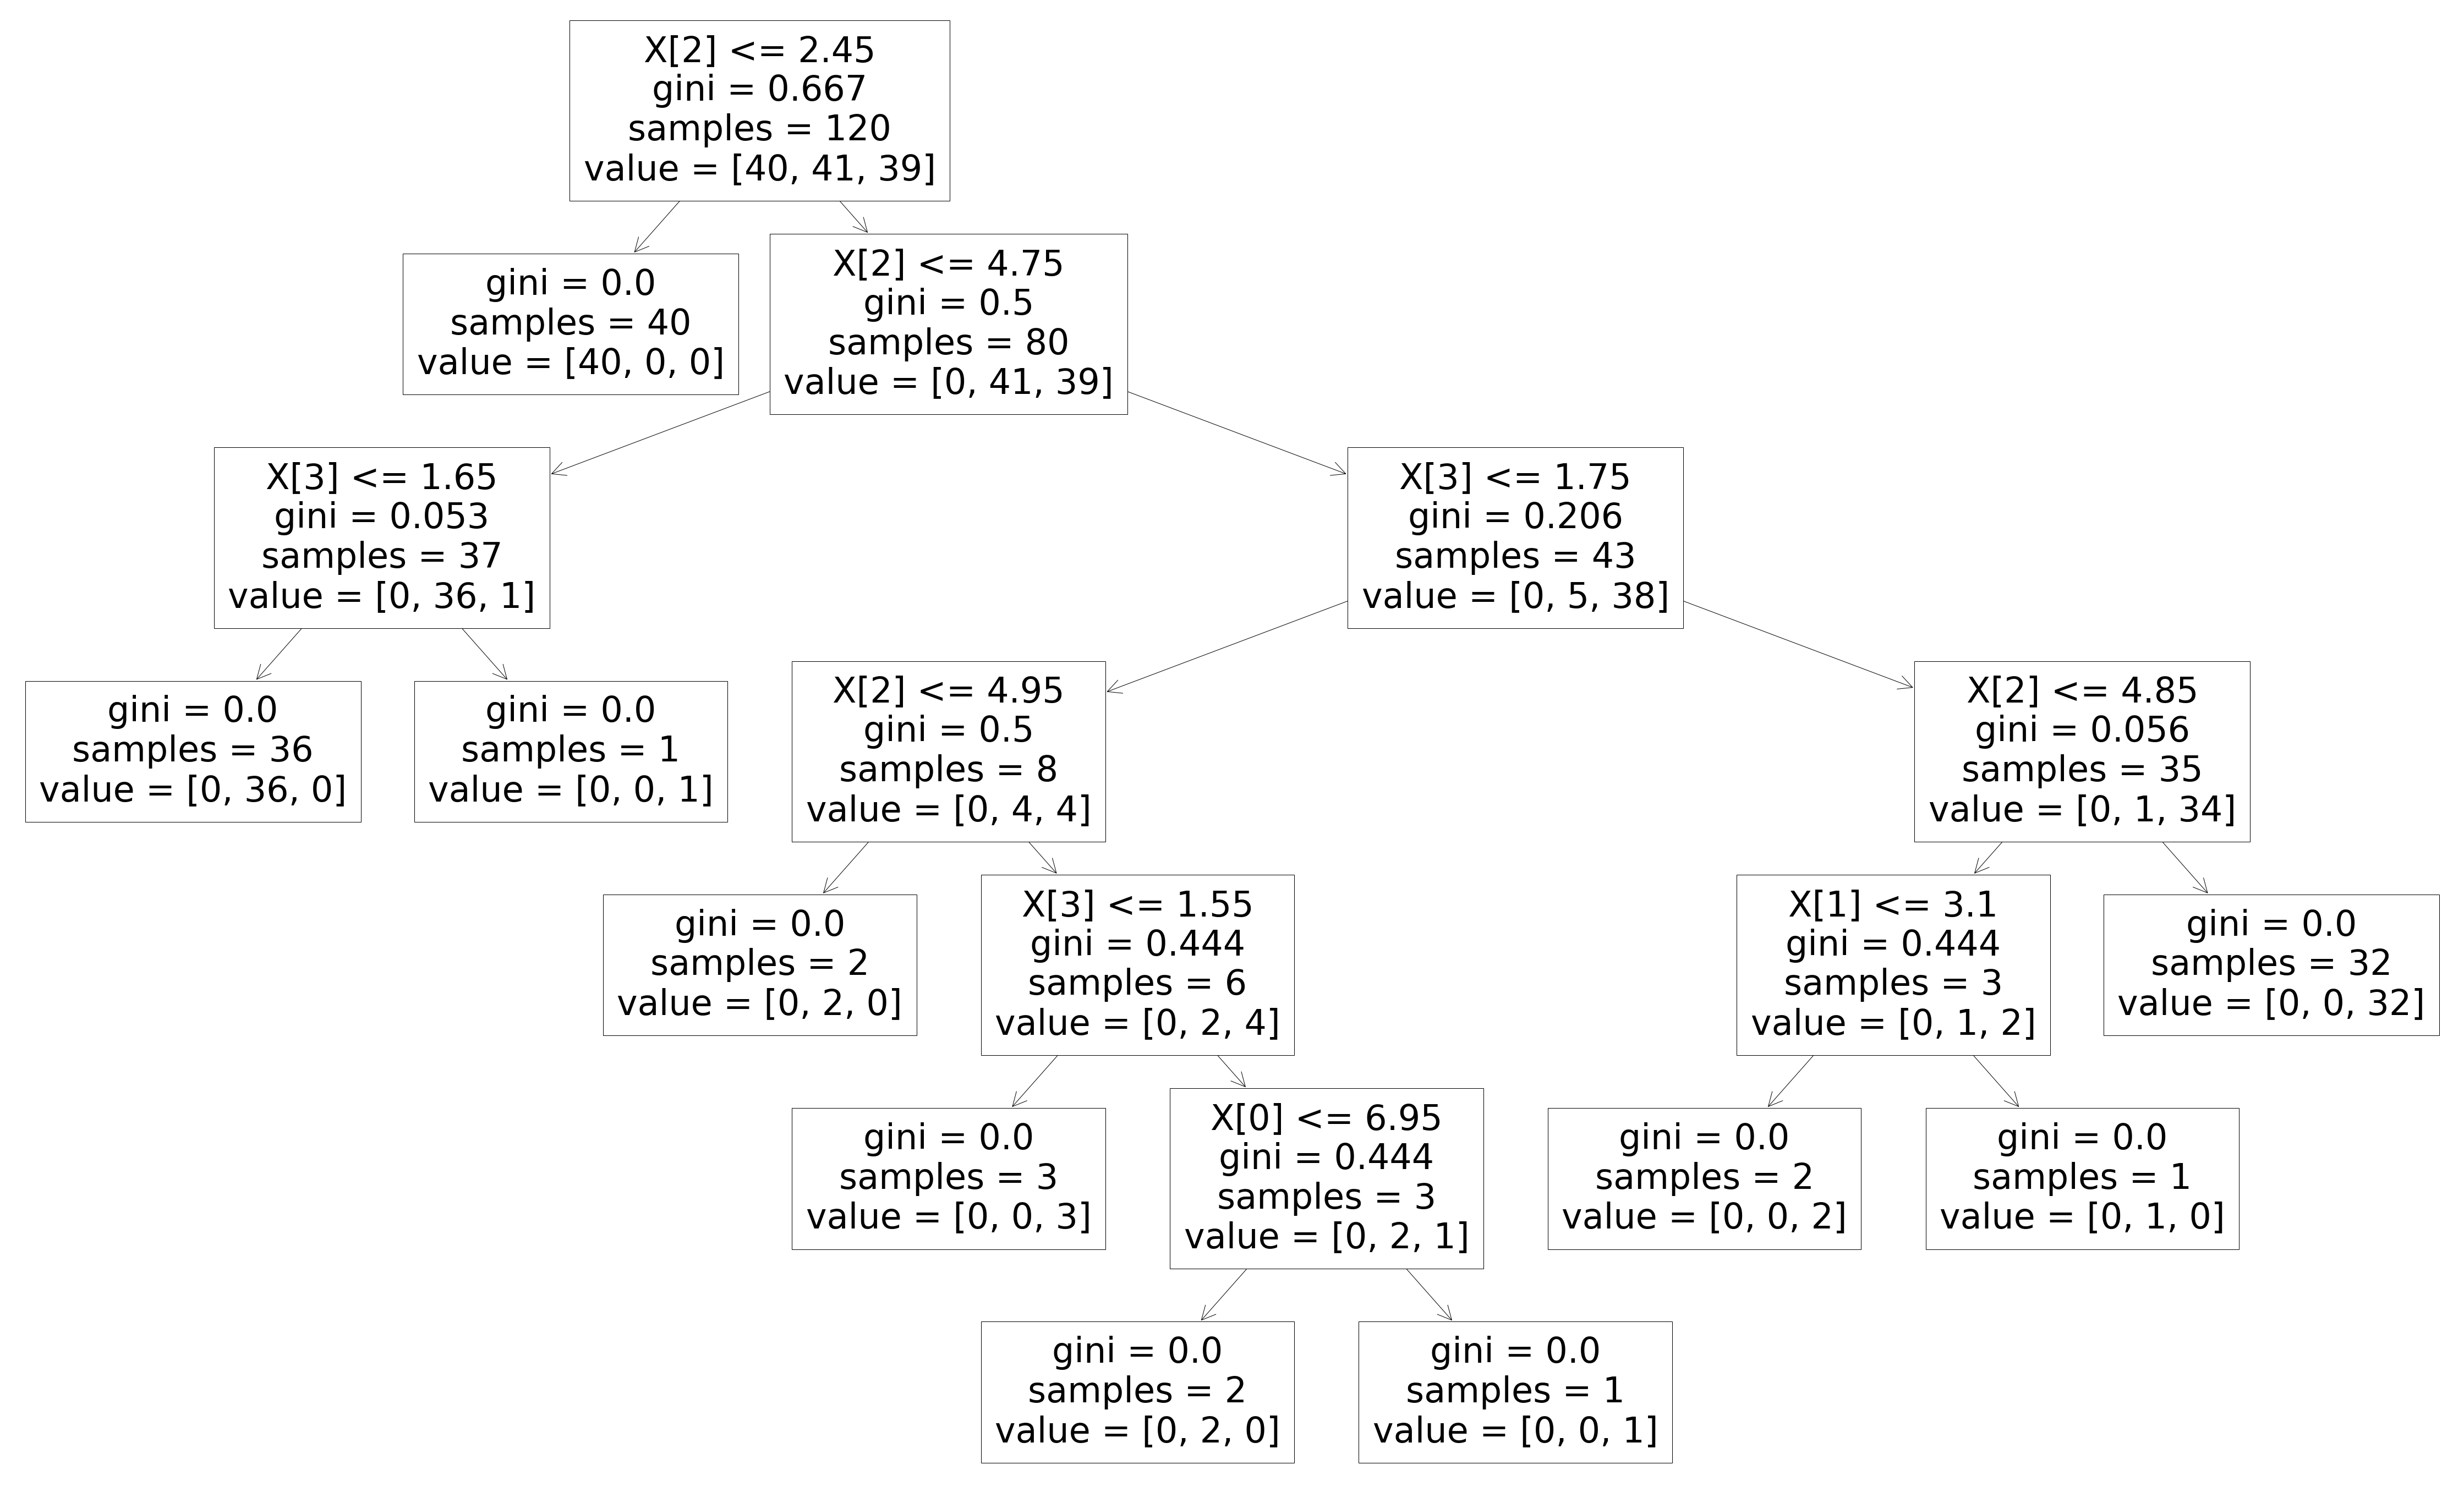

In [11]:
plot_tree(clf)

# 7.Model tuning <a class='anchor' id='tuning'></a> [↑](#top)

<p style=" font-family:cursive;">
Now let's set criteria of model to entropy and check
</p>

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(criterion="entropy")

In [13]:
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print('accuracy_score : ',accuracy_score(y_test,y_pred))

accuracy_score :  1.0


<p style=" font-family:cursive;"> 
    Here too we got 100% accuracy 
</p>